In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [7]:
import pandas as pd

# Load the dataset
sampleSubmission = pd.read_csv('/kaggle/input/dogs-vs-cats/sampleSubmission.csv')

# Now you can work with the dataset as usual
print(sampleSubmission.head())


   id  label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0


In [13]:
import zipfile
import os

# Path to the zip file
test1_zip_path = '/kaggle/input/dogs-vs-cats/test1.zip'
train_zip_path = '/kaggle/input/dogs-vs-cats/train.zip'

# Directory to extract to
extract_path = '/kaggle/working/'

# Extract the test1_zip_path file
with zipfile.ZipFile(test1_zip_path, 'r') as zip_ref1:
    zip_ref1.extractall(extract_path)
    
    
# Extract the train_zip_path file
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref2:
    zip_ref2.extractall(extract_path)

    
    
# List the files in the Test and Trian directory
TestDir = os.listdir(extract_path+"test1")
TrainDir = os.listdir(extract_path+"train")

# # Print the list of files in TestDir
# for testfile in TestDir:
#     print(testfile)

# Print the list of files in TrainDir
for trainfile in TrainDir:
    print(trainfile)

dog.10519.jpg
cat.3448.jpg
dog.3067.jpg
cat.4274.jpg
dog.3012.jpg
dog.8858.jpg
dog.894.jpg
cat.7758.jpg
dog.10807.jpg
cat.4633.jpg
dog.3082.jpg
cat.4899.jpg
dog.6145.jpg
cat.4118.jpg
dog.8729.jpg
dog.6946.jpg
cat.10441.jpg
dog.6485.jpg
dog.31.jpg
dog.1521.jpg
cat.659.jpg
cat.4219.jpg
cat.8415.jpg
dog.4371.jpg
dog.2266.jpg
cat.9228.jpg
cat.1464.jpg
dog.9318.jpg
dog.5047.jpg
cat.2597.jpg
dog.10001.jpg
cat.10639.jpg
dog.10715.jpg
dog.1826.jpg
dog.6223.jpg
dog.11056.jpg
dog.6576.jpg
cat.8461.jpg
dog.10668.jpg
dog.11408.jpg
dog.3646.jpg
dog.4654.jpg
cat.2051.jpg
dog.9123.jpg
dog.5749.jpg
dog.1975.jpg
cat.11984.jpg
dog.3396.jpg
cat.12444.jpg
cat.11473.jpg
dog.2769.jpg
dog.9129.jpg
dog.2530.jpg
cat.6466.jpg
dog.8932.jpg
dog.7739.jpg
cat.8188.jpg
dog.4917.jpg
dog.9616.jpg
cat.10341.jpg
dog.6665.jpg
dog.2321.jpg
cat.12097.jpg
cat.4646.jpg
dog.6256.jpg
cat.8536.jpg
dog.5889.jpg
dog.8789.jpg
cat.10629.jpg
dog.1331.jpg
dog.5564.jpg
dog.12168.jpg
dog.3081.jpg
cat.9022.jpg
dog.9063.jpg
dog.12406.jpg

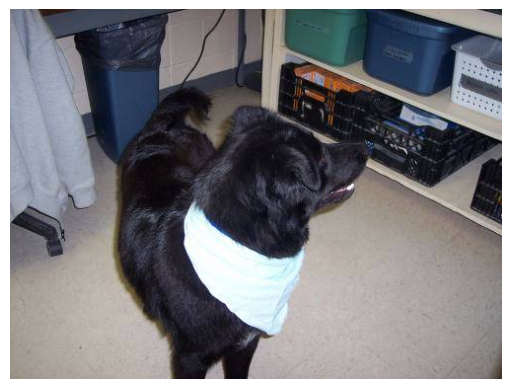

sh: 1: eog: not found


32512

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = '/kaggle/working/test1/1334.jpg'

# Load the image
img = mpimg.imread(image_path)

# Display the image using a specific image viewer
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show(block=False)  # Non-blocking show

# Using a custom image viewer, e.g., 'eog' for Linux, 'open' for macOS, 'start' for Windows
import os
os.system('eog {}'.format(image_path))  # Replace 'eog' with your preferred image viewer


In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define paths to train and test datasets
train_dir = '/kaggle/working/train/'
test_dir = '/kaggle/working/test1/'

# Define constants
img_width, img_height = 150, 150
batch_size = 32
epochs = 10

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation for training images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Load training data
train_filenames = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir)]
train_labels = [1 if 'dog' in fname else 0 for fname in os.listdir(train_dir)]  # 1 for dog, 0 for cat
train_labels = [str(label) for label in train_labels]  # Convert labels to strings
train_df = pd.DataFrame({'filename': train_filenames, 'label': train_labels})

# Create the generator for training data
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    x_col='filename',
                                                    y_col='label',
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs)

# Save the model
model.save('/kaggle/working/cats_vs_dogs_cnn_model.h5')

# Make predictions on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_filenames = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir)]
test_df = pd.DataFrame({'filename': test_filenames})

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  x_col='filename',
                                                  y_col=None,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode=None,
                                                  shuffle=False)

predictions = model.predict(test_generator, verbose=1)

# Save predictions to a CSV file for submission to Kaggle
filenames = [os.path.basename(filename) for filename in test_generator.filenames]
predictions_df = pd.DataFrame({'id': filenames, 'label': predictions.flatten()})
predictions_df['id'] = predictions_df['id'].apply(lambda x: x.split('.')[0])
predictions_df.to_csv('/kaggle/working/cats_vs_dogs_predictions.csv', index=False)

Found 25000 validated image filenames belonging to 2 classes.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/782 ━━━━━━━━━━━━━━━━━━━━ 2:14:16 10s/step - accuracy: 0.4688 - loss: 0.6949

I0000 00:00:1710231129.704609     172 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710231129.722979     172 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


771/782 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.5359 - loss: 0.7387

W0000 00:00:1710231279.203926     172 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 160s 192ms/step - accuracy: 0.5363 - loss: 0.7379
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 187ms/step - accuracy: 0.6128 - loss: 0.6559
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 186ms/step - accuracy: 0.6929 - loss: 0.5837
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 189ms/step - accuracy: 0.7252 - loss: 0.5441
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 187ms/step - accuracy: 0.7484 - loss: 0.5150
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Found 12500 validated image filenames.
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


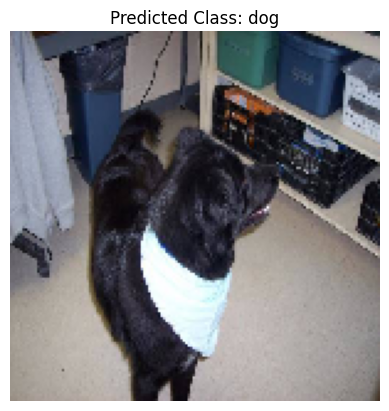

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


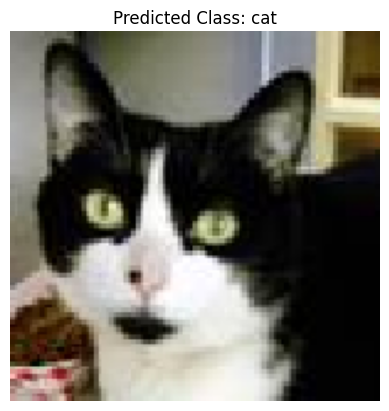

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


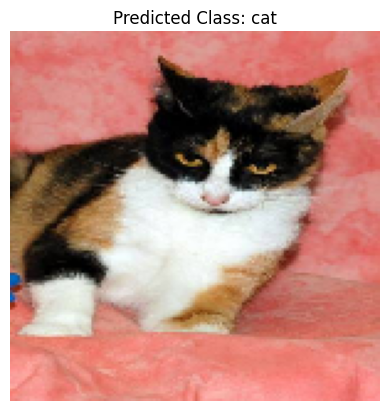

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


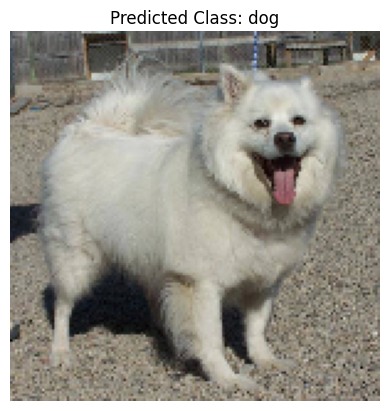

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


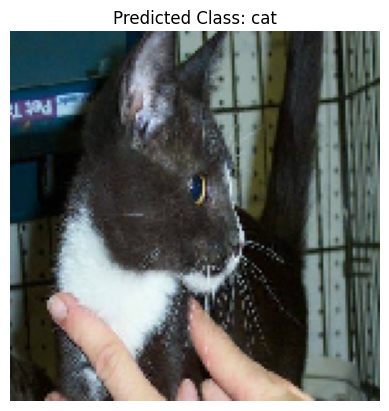

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


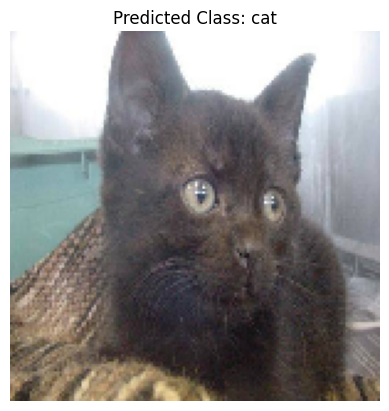

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


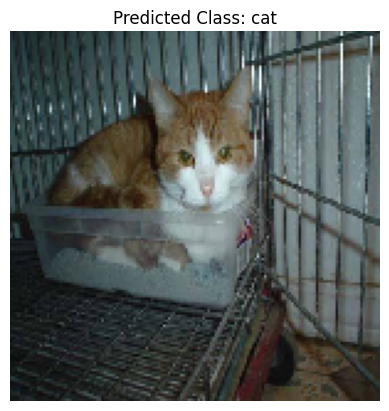

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


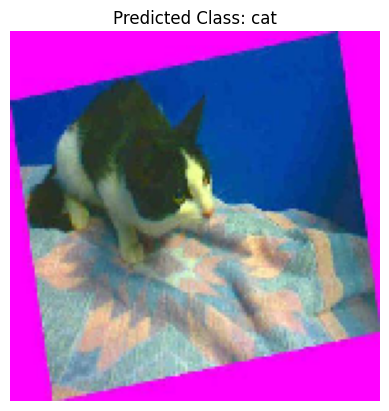

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


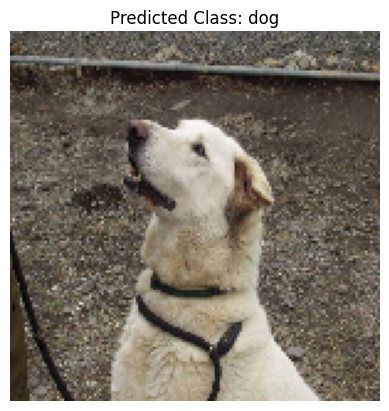

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


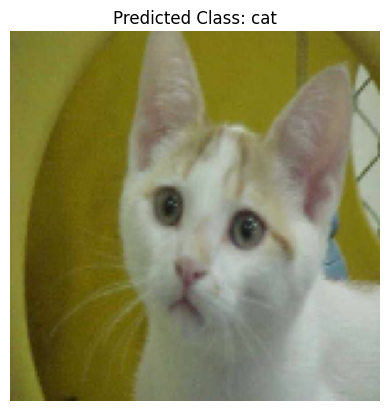

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


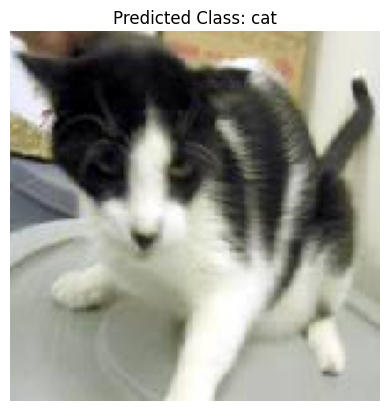

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


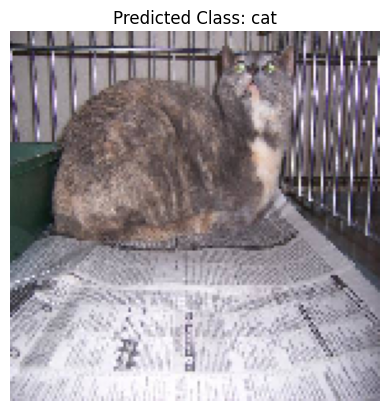

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


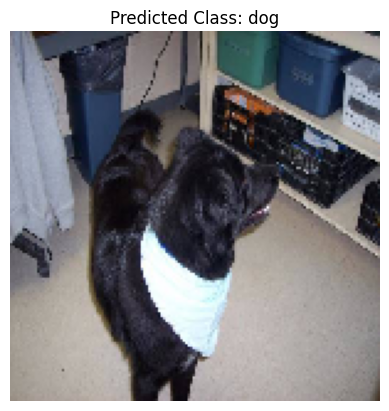

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


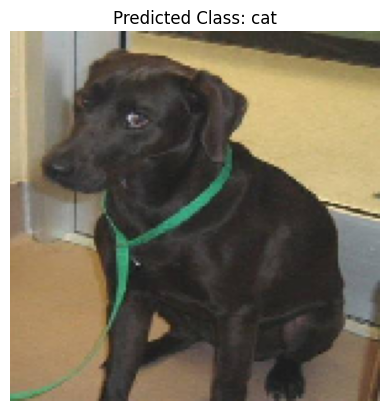

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


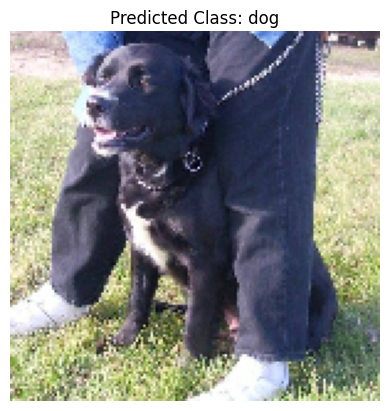

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


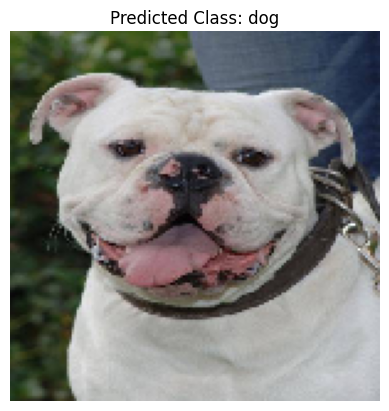

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


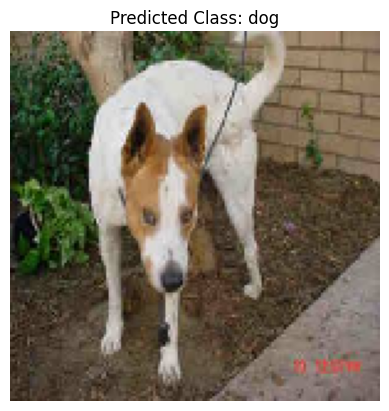

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


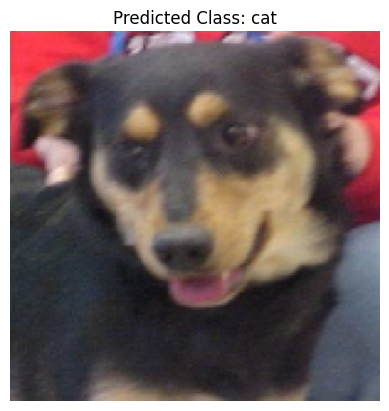

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


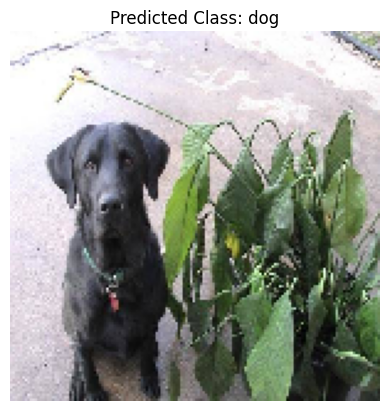

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


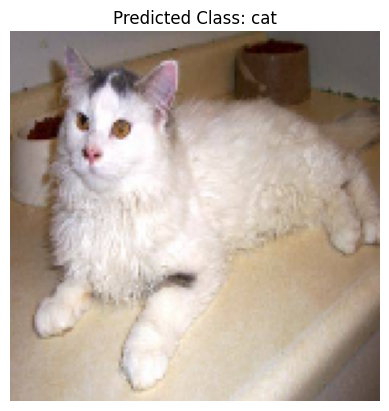

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


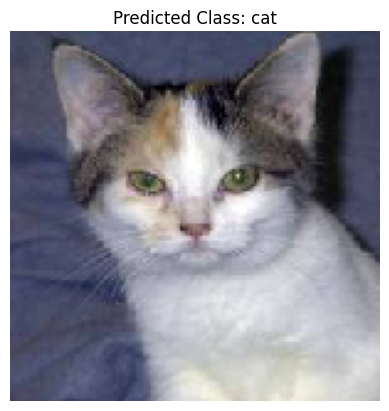

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


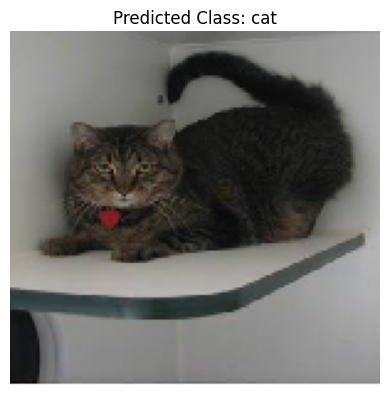

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


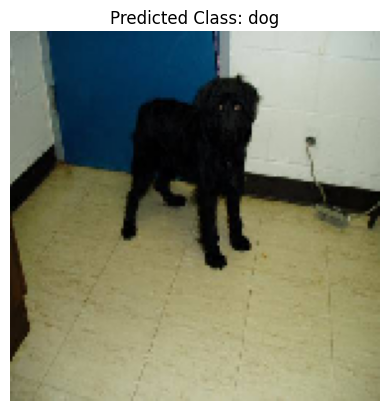

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


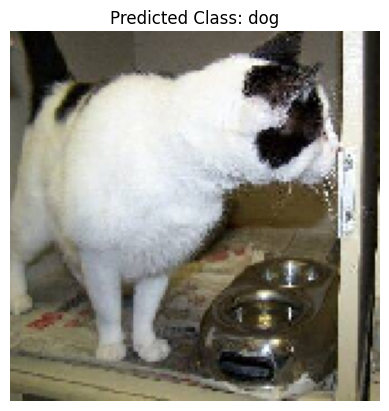

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


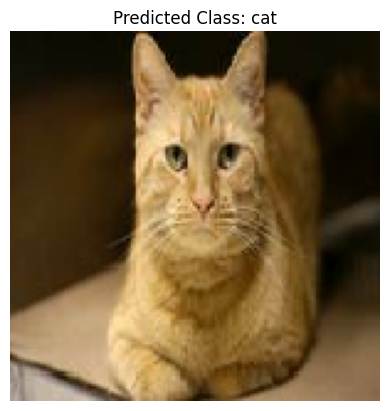

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


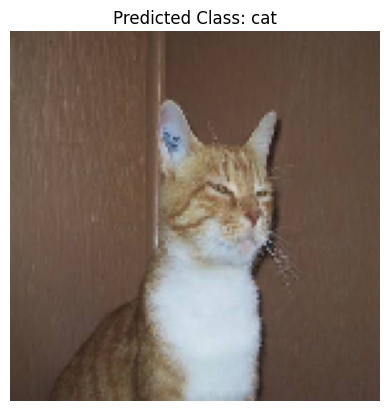

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


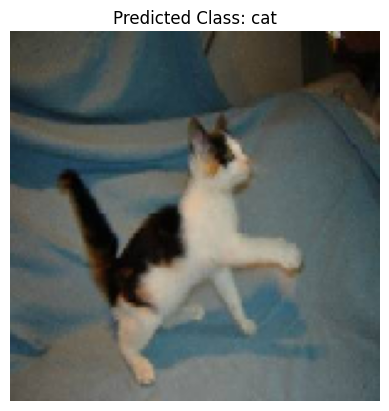

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


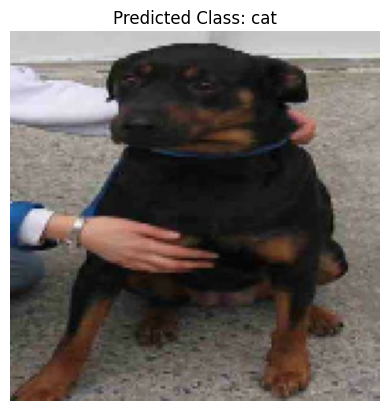

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('/kaggle/working/cats_vs_dogs_cnn_model.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Test images
test_image_paths = [
    '/kaggle/working/test1/3271.jpg',
    '/kaggle/working/test1/410.jpg',
    '/kaggle/working/test1/10134.jpg',
    '/kaggle/working/test1/3804.jpg',
    '/kaggle/working/test1/10986.jpg',
    '/kaggle/working/test1/12081.jpg',
    '/kaggle/working/test1/3660.jpg',
    '/kaggle/working/test1/473.jpg',
    '/kaggle/working/test1/4326.jpg',
    '/kaggle/working/test1/10150.jpg',
    '/kaggle/working/test1/7831.jpg',
    '/kaggle/working/test1/1334.jpg',
    '/kaggle/working/test1/4797.jpg',
    '/kaggle/working/test1/9437.jpg',
    '/kaggle/working/test1/182.jpg',
    '/kaggle/working/test1/9798.jpg',
    '/kaggle/working/test1/1275.jpg',
    '/kaggle/working/test1/2197.jpg',
    '/kaggle/working/test1/10543.jpg',
    '/kaggle/working/test1/6565.jpg',
    '/kaggle/working/test1/8926.jpg',
    '/kaggle/working/test1/8993.jpg',
    '/kaggle/working/test1/2251.jpg',
    '/kaggle/working/test1/3473.jpg',
    '/kaggle/working/test1/7227.jpg',
    '/kaggle/working/test1/11820.jpg',
    '/kaggle/working/test1/6128.jpg'
   
    
    
    # Add more test image paths as needed
]

# Make predictions
for image_path in test_image_paths:
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = "dog" if prediction[0][0] > 0.5 else "cat"
    
    # Display the image and predicted class
    img = image.load_img(image_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()
